# Simulation of single compartment model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from math import sin
from math import log

In [24]:
class SingleCompartmentModel:
    
    def __init__(self, E_m, L, d, r_m, r_a, c_m):
        self.E_m = E_m
        self.L = L
        self.d = d
        self.r_m = r_m
        self.r_a = r_a
        self.c_m = c_m
        self.R_m = r_m * pi*((d*10**-6)/2)**2
        self.C_m = c_m * pi * d*10**-6 * L * 10**-6
        self.R_a = r_a * L * 10**-6
        
        
    
    def backward_eulers_method(self,delta_t,t,input_function):
        
        
        # Initial condition
        t = np.arange(0,t,delta_t)
        steps = t.shape[0]
        V = np.zeros(steps)
        V[0] = self.E_m
        for i in range(1,steps):
            
            # dV/dt = (I_e - g_m(V(t) - E_m))/C_m = (V(t) - V(t-deltat))/deltat
            # deltaV = (V(t) - V[t-deltat])/delta_t 
            # V(t) = (C_m * V(t-deltat) + E_m * g_m * deltat + I_e * deltat)/(C_m + g_m * deltat)

            V[i] = (self.C_m * V[i-1] + self.E_m * (1/self.R_m) * delta_t + input_function(i*delta_t)*delta_t)/(self.C_m + (1/self.R_m)*delta_t)
            
        self.V = V  
        self.t = t      
                
        

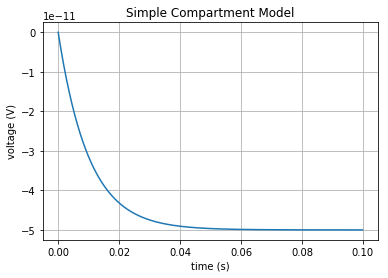

In [31]:
circuit1 = SingleCompartmentModel(0,100,2,1,1,10**-2)
delta_t = 0.0001 #s

def step_function(t):
    if(t>=0):
        return -50*10**-12

def create_sinusoidal_function(f):
    return lambda t: 100*10**-12*sin(2*pi*f*t)
    
    
circuit1.backward_eulers_method(delta_t, 0.1, step_function)

# Data for plotting
t = vars(circuit1)['t']
V = vars(circuit1)['V']

fig, ax = plt.subplots()
ax.plot(t, V)

ax.set(xlabel='time (s)', ylabel='voltage (V)',
       title='Simple Compartment Model')
ax.grid()

plt.show()




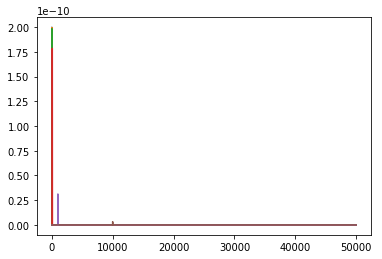

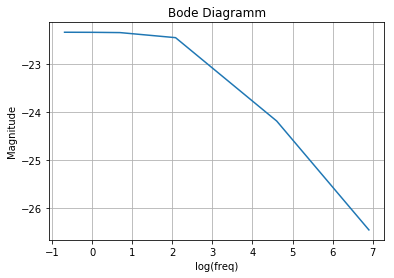

In [32]:
frequencies = [0.5,1,2,8,100,1000]
A = np.zeros(len(frequencies))

for i,f in enumerate(frequencies):
    sinusoidal = create_sinusoidal_function(f)
    circuit1.backward_eulers_method(delta_t, 10, sinusoidal)
    t = vars(circuit1)['t']
    V = vars(circuit1)['V']
    V_ft = np.fft.fft(V) # discreate fourier transformation
    N = int(len(V_ft)/2+1)
    
    A[i]= np.max(2.0*np.abs(V_ft[:N])/N)
    
    plt.plot(2.0*np.abs(V_ft[:N])/N) # plot amplitude spektrum 
plt.show()


log_A =  [log(a) for a in A]  
log_frequencies = [log(f) for f in frequencies]
fig, ax = plt.subplots()
ax.plot(log_frequencies, log_A)
ax.set(xlabel='log(freq)', ylabel='Magnitude',
           title='Bode Diagramm')
ax.grid()
plt.show()

